# week 9 Exercise Feature space

## Ex 1
`Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)
  
### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

In [3]:
import pandas as pd
import io
import requests
url='https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'
c=pd.read_csv(url)
c.head()



,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)

In [5]:
makeHonda = c[c["Identification.Make"] == "Honda"]
makeHonda

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
101,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,6,6 Speed Manual,17,Gasoline,25,Manual transmission,2010 Honda Accord EX-L V-6 Coup,Honda,2010 Honda Accord Coupe,2010,271,251
102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
105,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,5,5 Speed Automatic,19,Gasoline,28,Automatic transmission,2010 Honda Accord EX-L V-6 Coup AT,Honda,2010 Honda Accord Coupe,2010,271,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot LX,Honda,2012 Honda Pilot,2012,250,253
5068,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot LX 4WD,Honda,2012 Honda Pilot,2012,250,253
5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253


In [6]:
makeFuel = makeHonda[makeHonda["Fuel Information.Fuel Type"] == "Gasoline"]
makeFuel

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
101,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,6,6 Speed Manual,17,Gasoline,25,Manual transmission,2010 Honda Accord EX-L V-6 Coup,Honda,2010 Honda Accord Coupe,2010,271,251
102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
105,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,5,5 Speed Automatic,19,Gasoline,28,Automatic transmission,2010 Honda Accord EX-L V-6 Coup AT,Honda,2010 Honda Accord Coupe,2010,271,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot LX,Honda,2012 Honda Pilot,2012,250,253
5068,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot LX 4WD,Honda,2012 Honda Pilot,2012,250,253
5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253


In [ ]:
# Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`

## ????? 

In [42]:
#Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'

features = makeFuel.T
result = features.loc[['Fuel Information.Highway mpg', "Engine Information.Engine Statistics.Horsepower"]]
table = result.T
table.head()

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
101,25,271
102,31,190
103,31,190
104,31,190
105,28,271


In [43]:
#Normalize data (reduce values to be between 0 and 1)
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = table.columns
d = scaler.fit_transform(table)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,0.238095,1.000000
1,0.523810,0.474026
2,0.523810,0.474026
3,0.523810,0.474026
4,0.380952,1.000000


  
### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

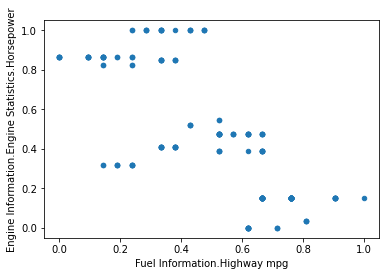

In [46]:
scaled_df.plot.scatter(x="Length" 0, y = 1)